In [536]:
import matplotlib
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [537]:
from bs4 import BeautifulSoup

main_url = "https://www.football-data.org/documentation/api"

# Getting individual cities url
re = requests.get(main_url)
soup = BeautifulSoup(re.text, "html.parser")
appendix = soup.find_all(id ="appendix")
table = appendix[0].find_all("table" , "table table-striped table-bordered")
for x in table[0].find_all("tr"):
    Code =  x.find_all("td")[0].string.strip()
    Nat = x.find_all("td")[1].string.strip()
    League = x.find_all("td")[2].string.strip()
    print(Code,Nat,League)

League-Code Country League
BL1 Germany 1. Bundesliga
BL2 Germany 2. Bundesliga
BL3 Germany 3. Bundesliga
DFB Germany Dfb-Cup
PL England Premiere League
EL1 England League One
ELC England Championship
FAC England FA-Cup
SA Italy Serie A
SB Italy Serie B
PD Spain Primera Division
SD Spain Segunda Division
CDR Spain Copa del Rey
FL1 France Ligue 1
FL2 France Ligue 2
DED Netherlands Eredivisie
PPL Portugal Primeira Liga
GSL Greece Super League
CL Europe Champions-League
EL Europe UEFA-Cup
EC Europe European-Cup of Nations
WC World World-Cup


In [538]:
def get_competition_matches(competition_code,year):    
    base_uri = 'https://api.football-data.org/v2/competitions/' + competition_code + '/matches'
    headers = { 'X-Auth-Token': 'f5cf8e3f132c4ae09eecfbb32e8b2952', 'Accept-Encoding': '' }
    uri = base_uri + "?season=" + str(year)
    response = requests.get(uri, headers=headers)
    data = response.json()
    df = pd.DataFrame(data['matches'])    
    #-------------------------------------------------------------------------------
    L_Season = []
    for item in df["season"]:
        a= item['startDate'][:4] +'-'+ item['endDate'][:4]
        L_Season.append(a)
    df["season"] = L_Season 
    #------------------------------------------------------------------------------- 
    L_FinalScore = []
    for item in df['score']:
        a= str(item['fullTime']['homeTeam']) +'-'+ str(item['fullTime']['awayTeam'])
        L_FinalScore.append(a)
    df['Full Time Score'] = L_FinalScore
    #------------------------------------------------------------------------------- 
    L_FinalScoreStatus = []
    L_FinalScoreStatusDummy = []
    for item in df['score']:
        a= item['winner']
        L_FinalScoreStatus.append(a) 
        if a=="HOME_TEAM":
            b=1
        elif a=="AWAY_TEAM":
            b=-1
        else :
            b=0
        L_FinalScoreStatusDummy.append(b)
    df['Full Time Score Status'] = L_FinalScoreStatus
    df['Full Time Score Status Dummy'] = L_FinalScoreStatusDummy
    #-------------------------------------------------------------------------------
    L_HalfScore = []
    for item in df['score']:
        a= str(item['halfTime']['homeTeam']) +'-'+ str(item['halfTime']['awayTeam'])
        L_HalfScore.append(a)
    df['Half Time Score'] = L_HalfScore
    #-------------------------------------------------------------------------------
    L_HalfScoreStatus = []
    for item in df['score']:
        try :
            b = item['halfTime']['homeTeam'] - item['halfTime']['awayTeam']

            if b > 0 :
                a = 'HOME_TEAM'
            elif b < 0 :
                a = 'AWAY_TEAM'
            else :
                a = 'DRAW'
        except:
             a = 'Scheduled'
        L_HalfScoreStatus.append(a)
    df['Half Time Score Status'] = L_HalfScoreStatus
    #-------------------------------------------------------------------------------
    L_homeTeamHS = []
    for item in df['score']:
        try:
            a=int(item['halfTime']['homeTeam'])
            L_homeTeamHS.append(a)        
        except: 
            L_homeTeamHS.append('NA')
    df['homeTeam HS'] = L_homeTeamHS
    #-------------------------------------------------------------------------------
    L_homeTeamFS = []
    for item in df['score']:
        try:
            a=int(item['fullTime']['homeTeam'])
            L_homeTeamFS.append(a)        
        except: 
            L_homeTeamFS.append('NA')
    df['homeTeam FS'] = L_homeTeamFS   
    #-------------------------------------------------------------------------------
    L_awayTeamHS = []
    for item in df['score']:
        try:
            a=int(item['halfTime']['awayTeam'])
            L_awayTeamHS.append(a)        
        except: 
            L_awayTeamHS.append('NA')    
    df['awayTeam HS'] = L_awayTeamHS
    #-------------------------------------------------------------------------------
    L_awayTeamFS = []
    for item in df['score']:
        try:
            a=int(item['fullTime']['awayTeam'])
            L_awayTeamFS.append(a)        
        except: 
            L_awayTeamFS.append('NA') 
    df['awayTeam FS'] = L_awayTeamFS    
    #-------------------------------------------------------------------------------
    L_HomeTeam = []
    for item in df['homeTeam']:
        a= str(item['name'])
        L_HomeTeam.append(a)
    df['homeTeam'] = L_HomeTeam    
    #-------------------------------------------------------------------------------
    L_AwayTeam = []
    for item in df['awayTeam']:
        a= str(item['name'])
        L_AwayTeam.append(a) 
    df['awayTeam'] = L_AwayTeam
    #-------------------------------------------------------------------------------
    df['utcDate'] = df['utcDate'].astype('datetime64[ns]')
    df['lastUpdated'] = df['lastUpdated'].astype('datetime64[ns]')
    #-------------------------------------------------------------------------------
    try:
        return df[['season','status','utcDate','homeTeam','homeTeam HS','homeTeam FS','awayTeam','awayTeam HS','awayTeam FS','Full Time Score','Full Time Score Status','Full Time Score Status Dummy','Half Time Score','Half Time Score Status']]
    except:
    
        return df

In [539]:
df = get_competition_matches('SA',2018)
df

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status
0,2018-2019,FINISHED,2018-08-18 16:00:00,AC Chievo Verona,1,2,Juventus FC,1,3,2-3,AWAY_TEAM,-1,1-1,DRAW
1,2018-2019,FINISHED,2018-08-18 18:30:00,SS Lazio,1,1,SSC Napoli,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW
2,2018-2019,FINISHED,2018-08-19 16:00:00,Torino FC,0,0,AS Roma,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW
3,2018-2019,FINISHED,2018-08-19 18:30:00,Bologna FC 1909,0,0,SPAL 2013,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW
4,2018-2019,FINISHED,2018-08-19 18:30:00,Parma Calcio 1913,1,2,Udinese Calcio,0,2,2-2,DRAW,0,1-0,HOME_TEAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-2019,FINISHED,2019-05-26 18:30:00,ACF Fiorentina,0,0,Genoa CFC,0,0,0-0,DRAW,0,0-0,DRAW
376,2018-2019,FINISHED,2019-05-26 18:30:00,AS Roma,1,2,Parma Calcio 1913,0,1,2-1,HOME_TEAM,1,1-0,HOME_TEAM
377,2018-2019,FINISHED,2019-05-26 18:30:00,Atalanta BC,1,3,US Sassuolo Calcio,1,1,3-1,HOME_TEAM,1,1-1,DRAW
378,2018-2019,FINISHED,2019-05-26 18:30:00,Cagliari Calcio,1,1,Udinese Calcio,0,2,1-2,AWAY_TEAM,-1,1-0,HOME_TEAM


In [540]:
df.head()
#Calls first 5 row and all column headers.

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status
0,2018-2019,FINISHED,2018-08-18 16:00:00,AC Chievo Verona,1,2,Juventus FC,1,3,2-3,AWAY_TEAM,-1,1-1,DRAW
1,2018-2019,FINISHED,2018-08-18 18:30:00,SS Lazio,1,1,SSC Napoli,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW
2,2018-2019,FINISHED,2018-08-19 16:00:00,Torino FC,0,0,AS Roma,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW
3,2018-2019,FINISHED,2018-08-19 18:30:00,Bologna FC 1909,0,0,SPAL 2013,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW
4,2018-2019,FINISHED,2018-08-19 18:30:00,Parma Calcio 1913,1,2,Udinese Calcio,0,2,2-2,DRAW,0,1-0,HOME_TEAM


In [541]:
df.shape
#Gives info about data set includes how many rows and columns.

(380, 14)

In [542]:
df.info()
#Gives detailed info about columns attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   season                        380 non-null    object        
 1   status                        380 non-null    object        
 2   utcDate                       380 non-null    datetime64[ns]
 3   homeTeam                      380 non-null    object        
 4   homeTeam HS                   380 non-null    int64         
 5   homeTeam FS                   380 non-null    int64         
 6   awayTeam                      380 non-null    object        
 7   awayTeam HS                   380 non-null    int64         
 8   awayTeam FS                   380 non-null    int64         
 9   Full Time Score               380 non-null    object        
 10  Full Time Score Status        380 non-null    object        
 11  Full Time Score Status Dummy  38

In [543]:
df.describe()
#Gives descriptive statistics about all integer columns in data set.

,homeTeam HS,homeTeam FS,awayTeam HS,awayTeam FS,Full Time Score Status Dummy
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.634211,1.484211,0.505263,1.197368,0.157895
std,0.779275,1.196857,0.724595,1.155687,0.832275
min,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000,-1.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000,2.000000,1.000000
max,4.000000,6.000000,3.000000,6.000000,1.000000


In [544]:
df['awayTeam HS'].describe()
#Gives descriptive statistics about selected integer columns in data set.

count    380.000000
mean       0.505263
std        0.724595
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: awayTeam HS, dtype: float64

In [545]:
df['awayTeam FS'].mean()
#Brings mean for selected column.

1.1973684210526316

In [546]:
df['homeTeam FS'].median()
#Brings median for selected column.

1.0

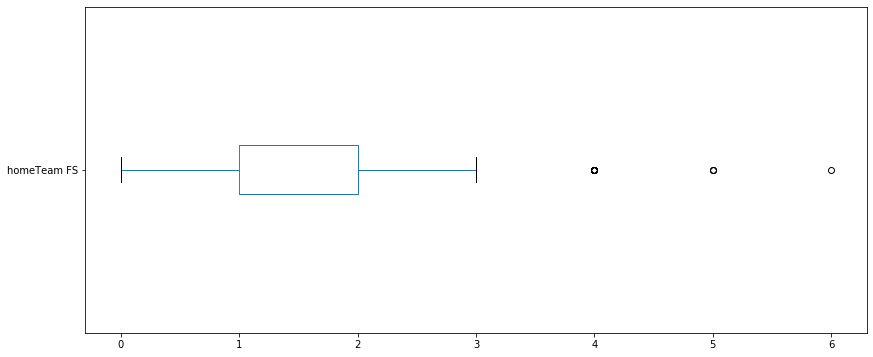

In [547]:
df['homeTeam FS'].plot(kind='box', vert=False, figsize=(14,6))
#Shows selected columns' values via boxplot.

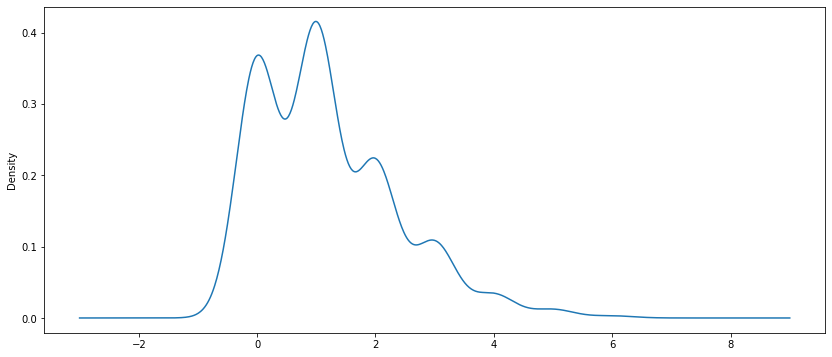

In [548]:
df['awayTeam FS'].plot(kind='density', figsize=(14,6))
#Shows selected columns' values via density plot.

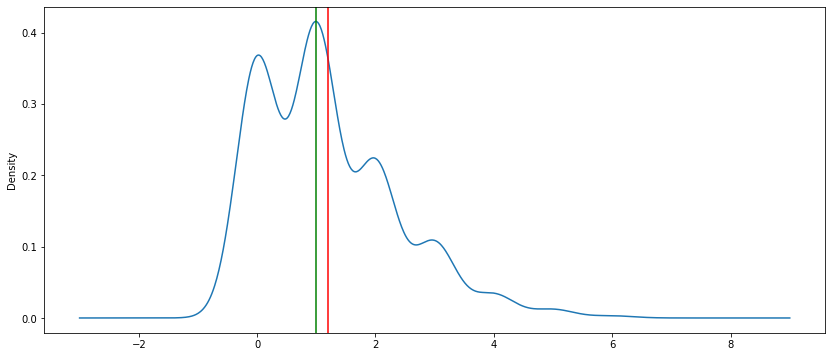

In [549]:
ax = df['awayTeam FS'].plot(kind='density', figsize=(14,6))
ax.axvline(df['awayTeam FS'].mean(), color='red')
ax.axvline(df['awayTeam FS'].median(), color='green')
#Marks mean and median with a line for selected columns' density plot.

Text(0.5, 0, 'Score')

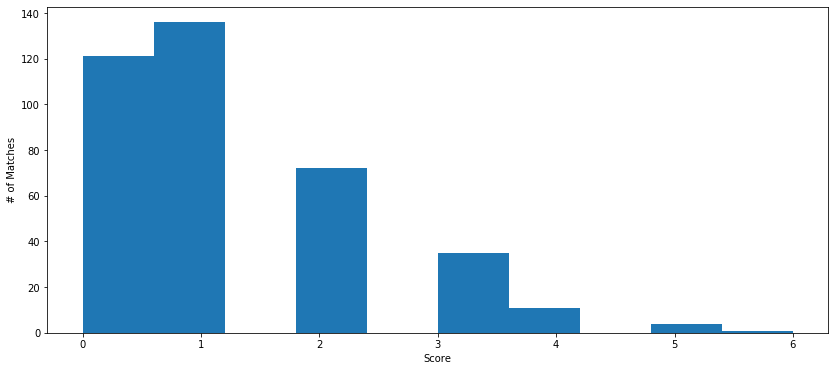

In [550]:
ax = df['awayTeam FS'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('# of Matches')
ax.set_xlabel('Score')
#Makes histogram plot for selected column and sets x and y axis' labels.

In [551]:
df['awayTeam'].value_counts()

AC Chievo Verona            19
SPAL 2013                   19
Atalanta BC                 19
ACF Fiorentina              19
Frosinone Calcio            19
SSC Napoli                  19
Parma Calcio 1913           19
US Sassuolo Calcio          19
AS Roma                     19
SS Lazio                    19
Bologna FC 1909             19
Juventus FC                 19
Cagliari Calcio             19
Udinese Calcio              19
Genoa CFC                   19
Torino FC                   19
Empoli FC                   19
UC Sampdoria                19
FC Internazionale Milano    19
AC Milan                    19
Name: awayTeam, dtype: int64

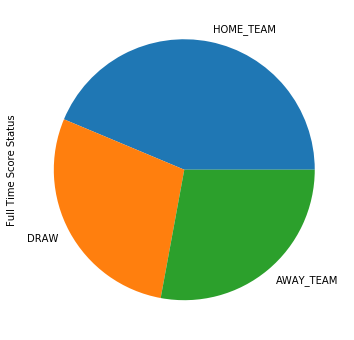

In [552]:

df['Full Time Score Status'].value_counts().plot(kind="pie",figsize =(14,6))

Text(0, 0.5, 'Number of statu')

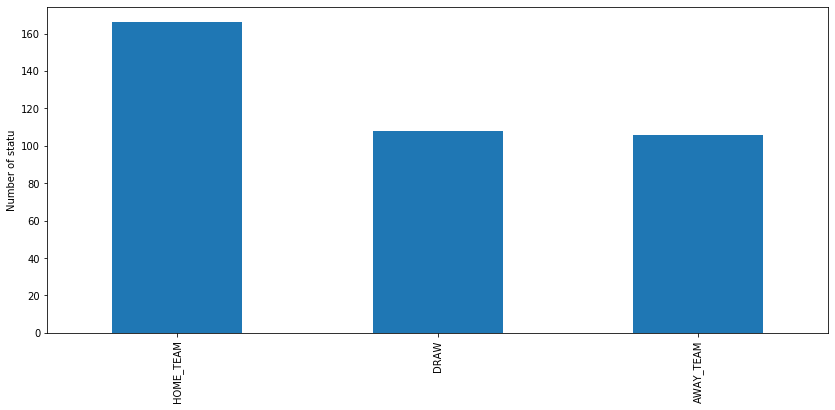

In [553]:
ax = df['Full Time Score Status'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of statu')

In [554]:

corr = df.corr()

corr

,homeTeam HS,homeTeam FS,awayTeam HS,awayTeam FS,Full Time Score Status Dummy
homeTeam HS,1.000000,0.679815,-0.012936,-0.010447,0.422879
homeTeam FS,0.679815,1.000000,0.015308,-0.008233,0.622332
awayTeam HS,-0.012936,0.015308,1.000000,0.665157,-0.377649
awayTeam FS,-0.010447,-0.008233,0.665157,1.000000,-0.616781
Full Time Score Status Dummy,0.422879,0.622332,-0.377649,-0.616781,1.000000


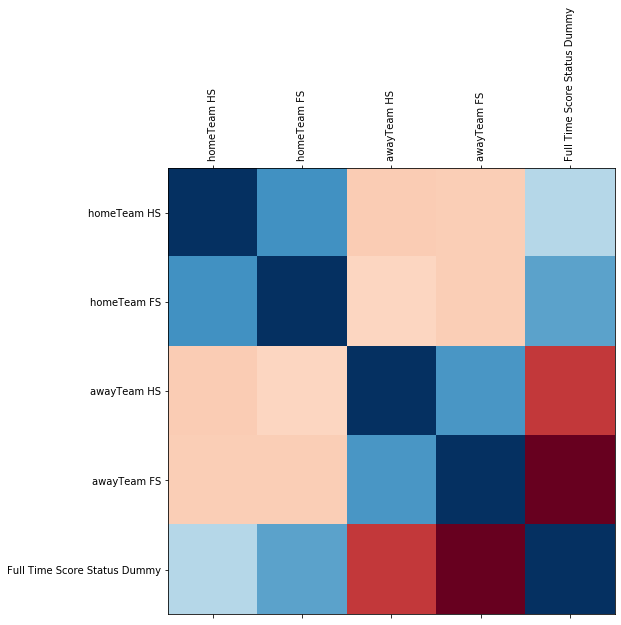

In [555]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

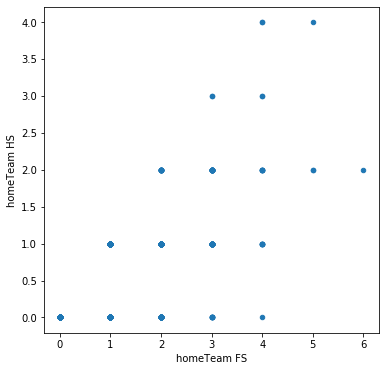

In [556]:
df.plot(kind='scatter', x='homeTeam FS', y='homeTeam HS', figsize=(6,6))

Text(0, 0.5, 'homeTeam FS')

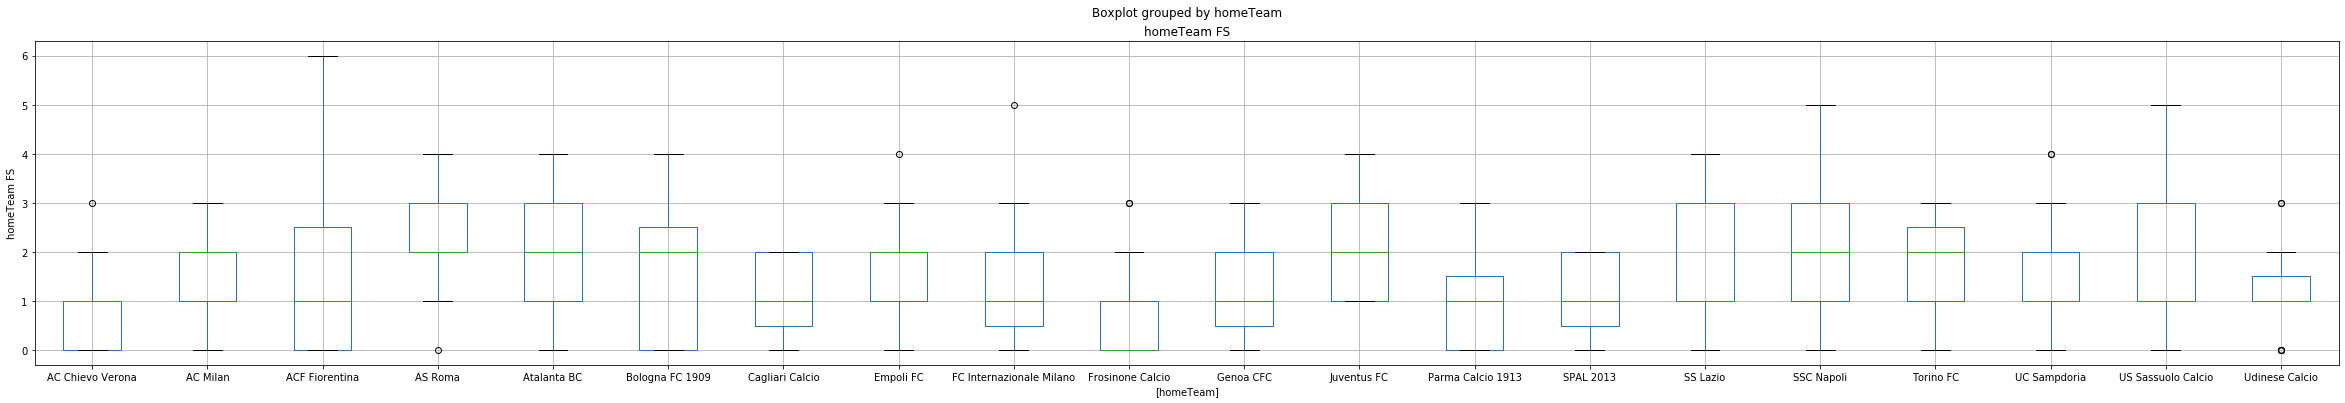

In [557]:
ax = df[['homeTeam FS', 'homeTeam']].boxplot(by='homeTeam', figsize=(40,6))
ax.set_ylabel('homeTeam FS')

In [558]:
df["TAOS"]=df["homeTeam FS"] + df["awayTeam FS"]
df

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
0,2018-2019,FINISHED,2018-08-18 16:00:00,AC Chievo Verona,1,2,Juventus FC,1,3,2-3,AWAY_TEAM,-1,1-1,DRAW,5
1,2018-2019,FINISHED,2018-08-18 18:30:00,SS Lazio,1,1,SSC Napoli,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW,3
2,2018-2019,FINISHED,2018-08-19 16:00:00,Torino FC,0,0,AS Roma,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1
3,2018-2019,FINISHED,2018-08-19 18:30:00,Bologna FC 1909,0,0,SPAL 2013,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1
4,2018-2019,FINISHED,2018-08-19 18:30:00,Parma Calcio 1913,1,2,Udinese Calcio,0,2,2-2,DRAW,0,1-0,HOME_TEAM,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2018-2019,FINISHED,2019-05-26 18:30:00,ACF Fiorentina,0,0,Genoa CFC,0,0,0-0,DRAW,0,0-0,DRAW,0
376,2018-2019,FINISHED,2019-05-26 18:30:00,AS Roma,1,2,Parma Calcio 1913,0,1,2-1,HOME_TEAM,1,1-0,HOME_TEAM,3
377,2018-2019,FINISHED,2019-05-26 18:30:00,Atalanta BC,1,3,US Sassuolo Calcio,1,1,3-1,HOME_TEAM,1,1-1,DRAW,4
378,2018-2019,FINISHED,2019-05-26 18:30:00,Cagliari Calcio,1,1,Udinese Calcio,0,2,1-2,AWAY_TEAM,-1,1-0,HOME_TEAM,3


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Question 1:
**How many goal have away-teams had in half time ?**

In [559]:
answer1 = df["awayTeam HS"].sum()
answer1

192

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question 2:

**How many goal have away-teams had in Full Time ?**

In [560]:
answer2 = df["awayTeam FS"].sum()
answer2

455

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Question 3:
**How many goal have home-teams had in Half Time ?**

In [561]:
answer3 = df["homeTeam HS"].sum()
answer3 

241

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Question 4:
**How many goal have home-teams had in Full Time ?**

In [562]:
answer4 = df["homeTeam FS"].sum()
answer4 

564

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Question 5:
**How many teams are there in Seri A ?**

In [563]:
Answer5 = df['awayTeam'].value_counts(normalize=True)
Answer5

AC Chievo Verona            0.05
SPAL 2013                   0.05
Atalanta BC                 0.05
ACF Fiorentina              0.05
Frosinone Calcio            0.05
SSC Napoli                  0.05
Parma Calcio 1913           0.05
US Sassuolo Calcio          0.05
AS Roma                     0.05
SS Lazio                    0.05
Bologna FC 1909             0.05
Juventus FC                 0.05
Cagliari Calcio             0.05
Udinese Calcio              0.05
Genoa CFC                   0.05
Torino FC                   0.05
Empoli FC                   0.05
UC Sampdoria                0.05
FC Internazionale Milano    0.05
AC Milan                    0.05
Name: awayTeam, dtype: float64

In [564]:
Answer5 = df['awayTeam'].nunique()
Answer5

20

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question 6:
**How many goals has Atalanta BC conceded in Half Time ?**

In [565]:
df.loc[(df['awayTeam'] == 'Atalanta BC')].head() # Brings selected team's all matches when it has been away-team throughout season 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
17,2018-2019,FINISHED,2018-08-27 18:30:00,AS Roma,1,3,Atalanta BC,3,3,3-3,DRAW,0,1-3,AWAY_TEAM,6
37,2018-2019,FINISHED,2018-09-17 18:30:00,SPAL 2013,0,2,Atalanta BC,0,0,2-0,HOME_TEAM,1,0-0,DRAW,2
47,2018-2019,FINISHED,2018-09-23 16:00:00,AC Milan,1,2,Atalanta BC,0,2,2-2,DRAW,0,1-0,HOME_TEAM,4
63,2018-2019,FINISHED,2018-09-30 13:00:00,ACF Fiorentina,0,2,Atalanta BC,0,0,2-0,HOME_TEAM,1,0-0,DRAW,2
84,2018-2019,FINISHED,2018-10-21 13:00:00,AC Chievo Verona,0,1,Atalanta BC,2,5,1-5,AWAY_TEAM,-1,0-2,AWAY_TEAM,6


In [566]:
CGH = df.loc[(df['awayTeam'] == 'Atalanta BC'),"homeTeam HS"].sum() # Summation of all conceded goal in half time for selected team by home team.
CGH

10

In [567]:
df.loc[(df['homeTeam'] == 'Atalanta BC')].head() # Brings selected team's all matches when it has been home-team throughout season 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
7,2018-2019,FINISHED,2018-08-20 18:30:00,Atalanta BC,1,4,Frosinone Calcio,0,0,4-0,HOME_TEAM,1,1-0,HOME_TEAM,4
26,2018-2019,FINISHED,2018-09-02 18:30:00,Atalanta BC,0,0,Cagliari Calcio,1,1,0-1,AWAY_TEAM,-1,0-1,AWAY_TEAM,1
54,2018-2019,FINISHED,2018-09-26 19:00:00,Atalanta BC,0,0,Torino FC,0,0,0-0,DRAW,0,0-0,DRAW,0
76,2018-2019,FINISHED,2018-10-07 13:00:00,Atalanta BC,0,0,UC Sampdoria,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1
89,2018-2019,FINISHED,2018-10-27 13:00:00,Atalanta BC,0,3,Parma Calcio 1913,0,0,3-0,HOME_TEAM,1,0-0,DRAW,3


In [568]:
CGA = df.loc[(df['homeTeam'] == 'Atalanta BC'),"awayTeam HS"].sum() # Summation of all conceded goal in half time for selected team by away team.
CGA

11

In [569]:
df.loc[(df['homeTeam'] == 'Atalanta BC') | (df['awayTeam'] == 'Atalanta BC')].head() # Brings selected team's all matches throughout season 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
7,2018-2019,FINISHED,2018-08-20 18:30:00,Atalanta BC,1,4,Frosinone Calcio,0,0,4-0,HOME_TEAM,1,1-0,HOME_TEAM,4
17,2018-2019,FINISHED,2018-08-27 18:30:00,AS Roma,1,3,Atalanta BC,3,3,3-3,DRAW,0,1-3,AWAY_TEAM,6
26,2018-2019,FINISHED,2018-09-02 18:30:00,Atalanta BC,0,0,Cagliari Calcio,1,1,0-1,AWAY_TEAM,-1,0-1,AWAY_TEAM,1
37,2018-2019,FINISHED,2018-09-17 18:30:00,SPAL 2013,0,2,Atalanta BC,0,0,2-0,HOME_TEAM,1,0-0,DRAW,2
47,2018-2019,FINISHED,2018-09-23 16:00:00,AC Milan,1,2,Atalanta BC,0,2,2-2,DRAW,0,1-0,HOME_TEAM,4


In [570]:
answer6 = CGH + CGA
answer6

21

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question 7:
**How many goals has Atalanta BC conceded by AS Roma in the end of match ?**

In [571]:
df.loc[(df["homeTeam"] == 'Atalanta BC') &  (df["awayTeam"] == 'AS Roma')] # All Atalanta's matches against AS Roma when Atalanta was host 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
205,2018-2019,FINISHED,2019-01-27 14:00:00,Atalanta BC,1,3,AS Roma,3,3,3-3,DRAW,0,1-3,AWAY_TEAM,6


In [572]:
CGSTWH = df.loc[(df["homeTeam"] == 'Atalanta BC') &  (df["awayTeam"] == 'AS Roma'), "awayTeam FS"].sum() # Total number of Atalanta's conceded goal by AS Roma when Atalanta was host 
CGSTWH

3

In [573]:
df.loc[(df["awayTeam"] == 'Atalanta BC') &  (df["homeTeam"] == 'AS Roma')] # All Atalanta's matches against AS Roma when Atalanta was guest 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
17,2018-2019,FINISHED,2018-08-27 18:30:00,AS Roma,1,3,Atalanta BC,3,3,3-3,DRAW,0,1-3,AWAY_TEAM,6


In [574]:
CGSTWA = df.loc[(df["awayTeam"] == 'Atalanta BC') &  (df["homeTeam"] == 'AS Roma') , "homeTeam FS"].sum() # Total number of Atalanta's conceded goal by AS Roma when Atalanta was guest 
CGSTWA

3

In [575]:
answer7 = CGSTWH + CGSTWA
answer7

6

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question 8:
**How many goals has Atalanta BC got to Juventus FC in the end of match ?**

In [576]:
df.loc[(df["homeTeam"] == 'Atalanta BC') &  (df["awayTeam"] == 'Juventus FC')] # All Atalanta's matches against Juventus FC when Atalanta was host 

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
172,2018-2019,FINISHED,2018-12-26 14:00:00,Atalanta BC,1,2,Juventus FC,1,2,2-2,DRAW,0,1-1,DRAW,4


In [577]:
SGSTWH = df.loc[(df["homeTeam"] == 'Atalanta BC') &  (df["awayTeam"] ==  'Juventus FC'), "homeTeam FS"].sum() # Total number of Atalanta's score goal to Juventus FC when Atalanta was host 
SGSTWH

2

In [578]:
df.loc[(df["homeTeam"] == 'Juventus FC' ) &  (df["awayTeam"] == 'Atalanta BC')] # All Atalanta's matches against Juventus FC when Atalanta was guest

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS
367,2018-2019,FINISHED,2019-05-19 18:30:00,Juventus FC,0,1,Atalanta BC,1,1,1-1,DRAW,0,0-1,AWAY_TEAM,2


In [579]:
SGSTWA = df.loc[(df["homeTeam"] == 'Juventus FC' ) &  (df["awayTeam"] == 'Atalanta BC'),"awayTeam FS"].sum() # Total number of Atalanta's score goal to Juventus FC when Atalanta was host 
SGSTWA

1

In [580]:
answer8 = SGSTWH + SGSTWA
answer8

3

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question9:
**Create Point Columns for both away-matches and home-matches**

In [581]:
df['awayTeam P'] = ((df['awayTeam FS'] - df['homeTeam FS'] > 0)*3 + (df['awayTeam FS'] - df['homeTeam FS'] == 0) * 1 + (df['awayTeam FS'] - df['homeTeam FS'] < 0) * 0).astype('int64')

In [582]:
df['homeTeam P'] = ((df['homeTeam FS'] - df['awayTeam FS'] > 0)*3 + (df['homeTeam FS'] - df['awayTeam FS'] == 0) * 1 + (df['homeTeam FS'] - df['awayTeam FS'] < 0) * 0).astype('int64')

In [583]:
answer9=df.info()
answer9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   season                        380 non-null    object        
 1   status                        380 non-null    object        
 2   utcDate                       380 non-null    datetime64[ns]
 3   homeTeam                      380 non-null    object        
 4   homeTeam HS                   380 non-null    int64         
 5   homeTeam FS                   380 non-null    int64         
 6   awayTeam                      380 non-null    object        
 7   awayTeam HS                   380 non-null    int64         
 8   awayTeam FS                   380 non-null    int64         
 9   Full Time Score               380 non-null    object        
 10  Full Time Score Status        380 non-null    object        
 11  Full Time Score Status Dummy  38

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question9:
**How many point did As Roma get until the end of selected season?**

In [588]:
PCH = df.loc[(df["homeTeam"] == "AS Roma"),'homeTeam P'].sum() # Points that collect from their homes
PCH

41

In [589]:
PCA = df.loc[(df["awayTeam"] == "AS Roma"),'awayTeam P'].sum() # Points that collect from their away
PCA

25

In [590]:
answer9 = PCH + PCA
answer9

66

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Question10:
****

In [619]:
df["awayTeam Point"]= df.groupby('awayTeam')['awayTeam P'].transform(pd.Series.cumsum)
df["homeTeam Point"]= df.groupby('homeTeam')['homeTeam P'].transform(pd.Series.cumsum)

In [620]:
v1 = df.loc[(df["homeTeam"]=="AC Milan"),"homeTeam Point"].max()
v2 = df.loc[(df["awayTeam"]=="AC Milan"),"awayTeam Point"].max()
v1 + v2

68

In [638]:
df.head()

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS,awayTeam P,homeTeam P,awayTeam Point,homeTeam Point
0,2018-2019,FINISHED,2018-08-18 16:00:00,AC Chievo Verona,1,2,Juventus FC,1,3,2-3,AWAY_TEAM,-1,1-1,DRAW,5,3,0,3,0
1,2018-2019,FINISHED,2018-08-18 18:30:00,SS Lazio,1,1,SSC Napoli,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW,3,3,0,3,0
2,2018-2019,FINISHED,2018-08-19 16:00:00,Torino FC,0,0,AS Roma,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1,3,0,3,0
3,2018-2019,FINISHED,2018-08-19 18:30:00,Bologna FC 1909,0,0,SPAL 2013,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1,3,0,3,0
4,2018-2019,FINISHED,2018-08-19 18:30:00,Parma Calcio 1913,1,2,Udinese Calcio,0,2,2-2,DRAW,0,1-0,HOME_TEAM,4,1,1,1,1


In [648]:
STHP = df.groupby('homeTeam').aggregate({'homeTeam P':'sum'})
STAP = df.groupby('awayTeam').aggregate({'awayTeam P':'sum'})
ST = pd.concat([STHP, STAP], axis=1 ,join="inner")
ST["Total Point"] = ST["homeTeam P"] + ST["awayTeam P"]
ST = ST.sort_values(["Total Point"],ascending=False)
ST

,homeTeam P,awayTeam P,Total Point
Juventus FC,49,41,90
SSC Napoli,43,36,79
Atalanta BC,35,34,69
FC Internazionale Milano,38,31,69
AC Milan,40,28,68
AS Roma,41,25,66
Torino FC,38,25,63
SS Lazio,32,27,59
UC Sampdoria,32,21,53
Bologna FC 1909,31,13,44


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Pandas - GroupBy

In [591]:
groupBy_hometeam = df.groupby(['homeTeam'])

In [592]:
groupBy_hometeam.groups

{'AC Chievo Verona': Int64Index([  0,  27,  45,  64,  84, 107, 116, 137, 168, 184, 203, 221, 244,
             261, 279, 316, 334, 341, 363],
            dtype='int64'),
 'AC Milan': Int64Index([ 18,  47,  75,  96,  99, 119, 133, 149, 162, 189, 202, 229, 240,
             251, 278, 289, 311, 349, 366],
            dtype='int64'),
 'ACF Fiorentina': Int64Index([ 11,  21,  41,  63,  86, 102, 131, 153, 171, 194, 222, 248, 267,
             284, 302, 313, 339, 352, 375],
            dtype='int64'),
 'AS Roma': Int64Index([ 17,  31,  53,  59,  79, 115, 138, 157, 176, 190, 217, 239, 268,
             285, 292, 310, 331, 357, 376],
            dtype='int64'),
 'Atalanta BC': Int64Index([  7,  26,  54,  76,  89, 114, 139, 158, 172, 205, 225, 232, 257,
             275, 298, 318, 338, 350, 377],
            dtype='int64'),
 'Bologna FC 1909': Int64Index([  3,  19,  46,  62,  85, 108, 125, 159, 175, 206, 224, 245, 262,
             287, 308, 324, 330, 358, 371],
            dtype='int64'),
 'Cag

In [593]:
groupBy_hometeam_awayTeam = df.groupby(['homeTeam','awayTeam']) 

In [594]:
groupBy_hometeam_awayTeam.groups

{('AC Chievo Verona', 'AC Milan'): Int64Index([261], dtype='int64'),
 ('AC Chievo Verona', 'ACF Fiorentina'): Int64Index([203], dtype='int64'),
 ('AC Chievo Verona', 'AS Roma'): Int64Index([221], dtype='int64'),
 ('AC Chievo Verona', 'Atalanta BC'): Int64Index([84], dtype='int64'),
 ('AC Chievo Verona', 'Bologna FC 1909'): Int64Index([116], dtype='int64'),
 ('AC Chievo Verona', 'Cagliari Calcio'): Int64Index([279], dtype='int64'),
 ('AC Chievo Verona', 'Empoli FC'): Int64Index([27], dtype='int64'),
 ('AC Chievo Verona',
  'FC Internazionale Milano'): Int64Index([168], dtype='int64'),
 ('AC Chievo Verona', 'Frosinone Calcio'): Int64Index([184], dtype='int64'),
 ('AC Chievo Verona', 'Genoa CFC'): Int64Index([244], dtype='int64'),
 ('AC Chievo Verona', 'Juventus FC'): Int64Index([0], dtype='int64'),
 ('AC Chievo Verona', 'Parma Calcio 1913'): Int64Index([334], dtype='int64'),
 ('AC Chievo Verona', 'SPAL 2013'): Int64Index([341], dtype='int64'),
 ('AC Chievo Verona', 'SS Lazio'): Int64Inde

In [595]:
for name, group in groupBy_hometeam:
    print(name)
    print(group)

AC Chievo Verona
        season    status             utcDate          homeTeam  homeTeam HS  \
0    2018-2019  FINISHED 2018-08-18 16:00:00  AC Chievo Verona            1   
27   2018-2019  FINISHED 2018-09-02 18:30:00  AC Chievo Verona            0   
45   2018-2019  FINISHED 2018-09-23 13:00:00  AC Chievo Verona            0   
64   2018-2019  FINISHED 2018-09-30 13:00:00  AC Chievo Verona            0   
84   2018-2019  FINISHED 2018-10-21 13:00:00  AC Chievo Verona            0   
107  2018-2019  FINISHED 2018-11-04 14:00:00  AC Chievo Verona            0   
116  2018-2019  FINISHED 2018-11-11 14:00:00  AC Chievo Verona            2   
137  2018-2019  FINISHED 2018-12-02 17:00:00  AC Chievo Verona            1   
168  2018-2019  FINISHED 2018-12-22 17:00:00  AC Chievo Verona            0   
184  2018-2019  FINISHED 2018-12-29 14:00:00  AC Chievo Verona            0   
203  2018-2019  FINISHED 2019-01-27 11:30:00  AC Chievo Verona            1   
221  2018-2019  FINISHED 2019-02-08

In [596]:
group_ASRoma = groupBy_hometeam.get_group("AS Roma")
group_ASRoma

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS,awayTeam P,homeTeam P
17,2018-2019,FINISHED,2018-08-27 18:30:00,AS Roma,1,3,Atalanta BC,3,3,3-3,DRAW,0,1-3,AWAY_TEAM,6,1,1
31,2018-2019,FINISHED,2018-09-16 10:30:00,AS Roma,2,2,AC Chievo Verona,0,2,2-2,DRAW,0,2-0,HOME_TEAM,4,1,1
53,2018-2019,FINISHED,2018-09-26 19:00:00,AS Roma,3,4,Frosinone Calcio,0,0,4-0,HOME_TEAM,1,3-0,HOME_TEAM,4,0,3
59,2018-2019,FINISHED,2018-09-29 13:00:00,AS Roma,1,3,SS Lazio,0,1,3-1,HOME_TEAM,1,1-0,HOME_TEAM,4,0,3
79,2018-2019,FINISHED,2018-10-20 13:00:00,AS Roma,0,0,SPAL 2013,1,2,0-2,AWAY_TEAM,-1,0-1,AWAY_TEAM,2,3,0
115,2018-2019,FINISHED,2018-11-11 14:00:00,AS Roma,1,4,UC Sampdoria,0,1,4-1,HOME_TEAM,1,1-0,HOME_TEAM,5,0,3
138,2018-2019,FINISHED,2018-12-02 19:30:00,AS Roma,0,2,FC Internazionale Milano,1,2,2-2,DRAW,0,0-1,AWAY_TEAM,4,1,1
157,2018-2019,FINISHED,2018-12-16 19:30:00,AS Roma,2,3,Genoa CFC,2,2,3-2,HOME_TEAM,1,2-2,DRAW,5,0,3
176,2018-2019,FINISHED,2018-12-26 17:00:00,AS Roma,2,3,US Sassuolo Calcio,0,1,3-1,HOME_TEAM,1,2-0,HOME_TEAM,4,0,3
190,2018-2019,FINISHED,2019-01-19 14:00:00,AS Roma,2,3,Torino FC,0,2,3-2,HOME_TEAM,1,2-0,HOME_TEAM,5,0,3


In [597]:
import numpy as np
groupBy_hometeam['homeTeam P'].agg([np.sum, np.mean ,np.std])

,sum,mean,std
homeTeam,,,
AC Chievo Verona,10,0.526316,0.772328
AC Milan,40,2.105263,1.242521
ACF Fiorentina,24,1.263158,1.147079
AS Roma,41,2.157895,1.167293
Atalanta BC,35,1.842105,1.302270
Bologna FC 1909,31,1.631579,1.382852
Cagliari Calcio,30,1.578947,1.304513
Empoli FC,30,1.578947,1.426565
FC Internazionale Milano,38,2.000000,1.247219


In [598]:
deneme = df.groupby('awayTeam')['awayTeam P'].agg(np.cumsum)
deneme

0       3
1       3
2       3
3       3
4       1
       ..
375    12
376    19
377    18
378    14
379    28
Name: awayTeam P, Length: 380, dtype: int64

In [599]:
deneme2 = df.groupby('awayTeam').aggregate({'awayTeam FS':'max','awayTeam P': 'sum' })
deneme2

,awayTeam FS,awayTeam P
awayTeam,,
AC Chievo Verona,2,10
AC Milan,4,28
ACF Fiorentina,4,17
AS Roma,3,25
Atalanta BC,6,34
Bologna FC 1909,3,13
Cagliari Calcio,3,11
Empoli FC,3,8
FC Internazionale Milano,4,31


In [600]:
df.head()

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS,awayTeam P,homeTeam P
0,2018-2019,FINISHED,2018-08-18 16:00:00,AC Chievo Verona,1,2,Juventus FC,1,3,2-3,AWAY_TEAM,-1,1-1,DRAW,5,3,0
1,2018-2019,FINISHED,2018-08-18 18:30:00,SS Lazio,1,1,SSC Napoli,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW,3,3,0
2,2018-2019,FINISHED,2018-08-19 16:00:00,Torino FC,0,0,AS Roma,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1,3,0
3,2018-2019,FINISHED,2018-08-19 18:30:00,Bologna FC 1909,0,0,SPAL 2013,0,1,0-1,AWAY_TEAM,-1,0-0,DRAW,1,3,0
4,2018-2019,FINISHED,2018-08-19 18:30:00,Parma Calcio 1913,1,2,Udinese Calcio,0,2,2-2,DRAW,0,1-0,HOME_TEAM,4,1,1


In [605]:
b.get_group(('AC Chievo Verona', 'AC Milan'))

,season,status,utcDate,homeTeam,homeTeam HS,homeTeam FS,awayTeam,awayTeam HS,awayTeam FS,Full Time Score,Full Time Score Status,Full Time Score Status Dummy,Half Time Score,Half Time Score Status,TAOS,awayTeam P,homeTeam P
261,2018-2019,FINISHED,2019-03-09 19:30:00,AC Chievo Verona,1,1,AC Milan,1,2,1-2,AWAY_TEAM,-1,1-1,DRAW,3,3,0


In [622]:
home_team = ["Roma","Milan","Roma","Juventus","Juventus","Milan"]
away_team =["Milan","Roma","Juventus","Roma","Milan","Juventus"]
hometeam_score =  np.random.randint(low=0, high=5, size=6)
awayteam_score =  np.random.randint(low=0, high=5, size=6)

In [623]:
sp = pd.DataFrame({"Home Team" : home_team ,
                            "Away Team" : away_team ,
                            "Home Team Score" : hometeam_score ,
                            "Away Team Score" : awayteam_score})

In [624]:
sp

,Home Team,Away Team,Home Team Score,Away Team Score
0,Roma,Milan,0,3
1,Milan,Roma,4,4
2,Roma,Juventus,4,1
3,Juventus,Roma,1,0
4,Juventus,Milan,1,4
5,Milan,Juventus,1,2


In [625]:
sp['AwayTeam P'] = ((sp['Away Team Score'] - sp['Home Team Score'] > 0)*3 + (sp['Away Team Score'] - sp['Home Team Score'] == 0) * 1 + (sp['Away Team Score'] - sp['Home Team Score'] < 0) * 0).astype('int64')

In [626]:
sp['HomeTeam P'] = ((sp['Home Team Score'] - sp['Away Team Score'] > 0)*3 + (sp['Home Team Score'] - sp['Away Team Score'] == 0) * 1 + (sp['Home Team Score'] - sp['Away Team Score'] < 0) * 0).astype('int64')

In [635]:
ga = sp.groupby('Away Team').aggregate({'AwayTeam P':'sum'})

In [636]:
gh = sp.groupby('Home Team').aggregate({'HomeTeam P':'sum'})

In [629]:
type(ga)
ga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Juventus to Roma
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AwayTeam P  3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [630]:
type(sp)

pandas.core.frame.DataFrame

In [631]:
gh

,HomeTeam P
Home Team,
Juventus,3
Milan,1
Roma,3


In [632]:
df_row = pd.concat([ga, gh])
df_row

,AwayTeam P,HomeTeam P
Juventus,3.0,NaN
Milan,6.0,NaN
Roma,1.0,NaN
Juventus,NaN,3.0
Milan,NaN,1.0
Roma,NaN,3.0


In [634]:
df_row2 = pd.concat([ga, gh], axis=1 ,join="inner")
df_row2

,AwayTeam P,HomeTeam P
Juventus,3,3
Milan,6,1
Roma,1,3
